In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
movies = pd.read_csv("Data/Recomendation-data/movies.csv")

ratings = pd.read_csv("Data/Recomendation-data/ratings.csv")

In [83]:
#Renaming the column
movies.rename(columns={'movieId': 'movie_id'},inplace=True)
movies.head(6)

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


In [84]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [85]:
#Dropping the timestamp column as we don't need it now.
ratings.drop(['timestamp'],axis=1, inplace=True)
ratings.head(6)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0


In [86]:
#Renaming the ratings column
ratings.rename(columns={'userId': 'user_id', 'movieId':'movie_id'},inplace=True)
ratings.head(4)

,user_id,movie_id,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0


In [87]:
#Merging two dataframes on movie_id column
ratings = pd.merge(ratings,movies,on='movie_id')

In [88]:
ratings.head(5)

,user_id,movie_id,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [89]:
#Mean of the movies.

ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [90]:
# Number of ratings a received by the users.

ratings.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [91]:
#Converitng the mean of ratings into a dataframe.

ratings_mean = pd.DataFrame(ratings.groupby('title')['rating'].mean())
ratings_mean.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [92]:
#Adding new columns

ratings_mean['number_of_ratings']= pd.DataFrame(ratings.groupby('title')['rating'].count())
ratings_mean.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


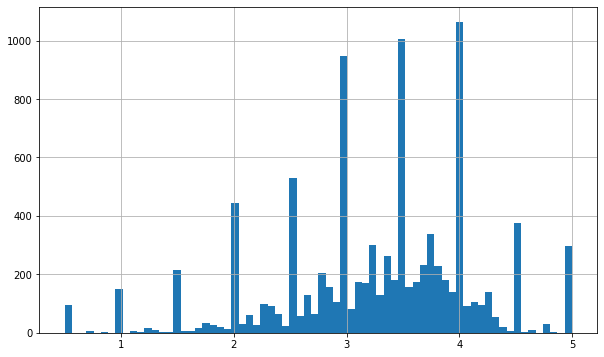

In [93]:
plt.figure(figsize=(10,6))
ratings_mean['rating'].hist(bins=70)

In [94]:
# We need to create a matrix, a sparse matrix where rows would be user_id, columns would be the title and values
# would be the ratings. It will help us to find the correlation.

user_movie_ratings_matrix = ratings.pivot_table(index='user_id',columns='title',values='rating')
user_movie_ratings_matrix.head(1000)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [95]:
#sorting the ratings_mean dataframe on the maximum number of ratings received fromt he users.

ratings_mean.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [96]:
#We'll try to find movies similar to pulp fiction and Forrest Gump

pulp_fiction_user_ratings = user_movie_ratings_matrix['Pulp Fiction (1994)']
forrest_gump_user_ratings = user_movie_ratings_matrix['Forrest Gump (1994)']

In [97]:
pulp_fiction_user_ratings.head()

user_id
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

In [98]:
forrest_gump_user_ratings.head()

user_id
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [99]:
# Using all the ratings of pulp fiction and Forrest Gump, we're trying to find the correlation with all the other movies 
# from user_movie_ratings_matrix dataframe.

similar_to_pulp_fiction = user_movie_ratings_matrix.corrwith(pulp_fiction_user_ratings)
similar_to_forrest_gump = user_movie_ratings_matrix.corrwith(forrest_gump_user_ratings)

C:\Users\Hp\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Hp\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [100]:
# Creating a dataframe with the correlations found and dropping all the None values.

corr_pulp_fiction = pd.DataFrame(similar_to_pulp_fiction,columns=["Correlation"])
corr_pulp_fiction.dropna(inplace=True)
corr_pulp_fiction.head()

,Correlation
title,
"'burbs, The (1989)",-0.187323
(500) Days of Summer (2009),-0.044034
*batteries not included (1987),-0.738549
...And Justice for All (1979),-0.188982
10 Cent Pistol (2015),1.000000


In [101]:
# Sorting with movies with highest correlation.

corr_pulp_fiction.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Azumi (2003),1.0
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0
"War Zone, The (1999)",1.0
"Wolfman, The (2010)",1.0
Outlander (2008),1.0
Luxo Jr. (1986),1.0
"Claymation Christmas Celebration, A (1987)",1.0
"Return, The (Vozvrashcheniye) (2003)",1.0


In [102]:
#Adding a column from ratings_mean dataframe in order to keep track of the numer of ratings it receieved. This would 
# help us filtering out movies with insignificant amount of ratings. 

corr_pulp_fiction = corr_pulp_fiction.join(ratings_mean['number_of_ratings'])
corr_pulp_fiction.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",-0.187323,17
(500) Days of Summer (2009),-0.044034,42
*batteries not included (1987),-0.738549,7
...And Justice for All (1979),-0.188982,3
10 Cent Pistol (2015),1.000000,2


In [103]:
#Experimenting few filters, I've figured out if we count movies that got more than 100 ratings
#giving me the gihest outcome. 

# not a bad result, huh?

corr_pulp_fiction[corr_pulp_fiction['number_of_ratings']>130].sort_values('Correlation',ascending=False).head(11)

,Correlation,number_of_ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
"Usual Suspects, The (1995)",0.411700,204
Eternal Sunshine of the Spotless Mind (2004),0.401534,131
Reservoir Dogs (1992),0.394687,131
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.391141,177
"Godfather, The (1972)",0.364778,192
One Flew Over the Cuckoo's Nest (1975),0.361062,133


In [104]:
#Doing the same thing with Forrest Gump.

In [105]:
corr_forrest_gump = pd.DataFrame(similar_to_forrest_gump, columns=["Correlation"])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head(5)

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [106]:
corr_forrest_gump.sort_values('Correlation',ascending=False).head(10)


,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [107]:
corr_forrest_gump= corr_forrest_gump.join(ratings_mean['number_of_ratings'])
corr_forrest_gump.head(10)

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),0.752057,14
10 Items or Less (2006),-1.000000,3
10 Things I Hate About You (1999),0.088009,54
"10,000 BC (2008)",-0.143823,17


In [108]:
corr_forrest_gump[corr_forrest_gump['number_of_ratings']>150].sort_values('Correlation',ascending=False).head(11)

,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Aladdin (1992),0.464268,183
Braveheart (1995),0.416976,237
Saving Private Ryan (1998),0.390074,188
Back to the Future (1985),0.360036,171
Dances with Wolves (1990),0.351929,164
"Lion King, The (1994)",0.338577,172
Toy Story (1995),0.303465,215
"Shawshank Redemption, The (1994)",0.297438,317
